<a href="https://colab.research.google.com/github/wenqilyu/Capstone/blob/main/sentiment_ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Capstone

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Capstone


In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
import re
import pandas as pd
! pip install jieba
! pip install wordcloud
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud 
import collections 

In [12]:
tweets = pd.read_csv('output2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,10,11,12,13,15,16,17,18,19,20,21,23,24,29,30,31,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
tweets=tweets[tweets['language']=="['en']"]

In [14]:
len(tweets)

413384

In [54]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [58]:
text=tweets['text']

In [70]:
len(text)

413384

In [72]:
text=text.dropna()

In [73]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.head()

,neg,neu,pos,compound
0,0.000,0.879,0.121,0.4404
1,0.123,0.727,0.150,0.1531
2,0.000,1.000,0.000,0.0000
3,0.162,0.838,0.000,-0.4019
4,0.186,0.814,0.000,-0.4939


In [77]:
tweets["sentiment"] = sent_scores_df['compound']
tweets[['text','sentiment']].head()

,text,sentiment
0,mask nazis guy mayor tn spike covid case good ...,0.4404
1,"uh guy "" orlando health answer question confir...",0.1531
2,eye opening thread covid19 1 mortality 😭 htt...,0.0000
3,month global pandemic study show covid19 exace...,-0.4019
6,15yearold michigan incarcerate coronavirus pan...,-0.7269


In [83]:
def Polarity_score(data):
  if data['sentiment'] == 0:
    return 'Neu'
  elif data["sentiment"] > 0:
    return 'Pos'
  else:
    return 'Neg'

In [84]:
tweets['new_sentiment'] = tweets.apply(Polarity_score, axis=1)

In [85]:
tweets[['text','new_sentiment']]

,text,new_sentiment
0,mask nazis guy mayor tn spike covid case good ...,Pos
1,"uh guy "" orlando health answer question confir...",Pos
2,eye opening thread covid19 1 mortality 😭 htt...,Neu
3,month global pandemic study show covid19 exace...,Neg
6,15yearold michigan incarcerate coronavirus pan...,Neg
...,...,...
1245720,2020 industry report 📜 \n\n nz interactive gam...,Neg
1245722,tweet hour american kill covid 33 year honor p...,Neg
1245723,10 year ago bernie senate floor 8 hour fight e...,Neg
1245724,elizalynvargas compare aids epidemic covid o...,Neg


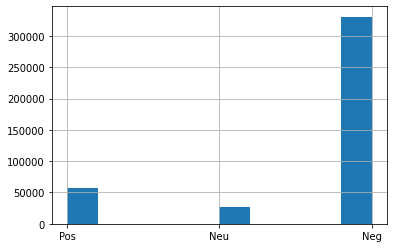

In [86]:
tweets['new_sentiment'].hist()

In [94]:
pos=tweets[tweets['new_sentiment']=="Pos"]['text']
neg=tweets[tweets['new_sentiment']=="Neg"]['text']

In [92]:
# count the words
words_list=str(pos.tolist()).split()
word_counts = collections.Counter(words_list)
del word_counts["\\n\\n"]
del word_counts["\\n"]

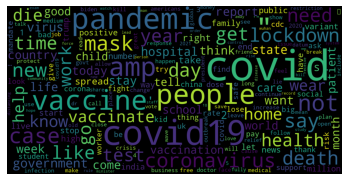

In [97]:
word_char=WordCloud(width=1600, height=800,max_font_size=200)
word_plot=word_char.fit_words(word_counts)
plt.imshow(word_plot)
plt.axis("off")
plt.show()

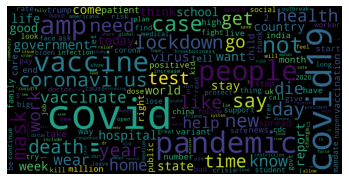

In [96]:
# count the words
words_list=str(neg.tolist()).split()
word_counts = collections.Counter(words_list)
del word_counts["\\n\\n"]
del word_counts["\\n"]
word_char=WordCloud(width=1600, height=800,max_font_size=200)
word_plot=word_char.fit_words(word_counts)
plt.imshow(word_plot)
plt.axis("off")
plt.show()